# **ETPoF** Homework 1
Annemarie Linnenbank & Tommie Verouden

*16 February 2024*

## Part a: Constant Temperature Anemometry (5 points)
### 1a1) **Velocity**

Below, we have plotted the velocity as a function of time, for the unmasked signal (on the right) and masked signal (on the left). The only differences between these two are the large peaks (up to $3$ $\text{m/s}$), which are not present when the faulty data points (where a bubble-probe collision occurs) are masked.

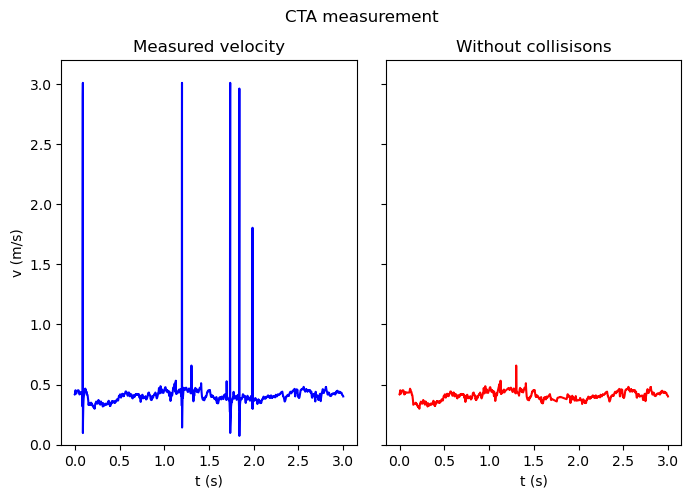

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
arr = np.loadtxt("Data/CTA_data.csv", skiprows=1, delimiter=',')
t = arr[:30000-1, 0]
v = arr[:30000-1, 1]
mask = arr[:30000-1, 2]

# Mask data
vmask = np.ma.masked_where(mask == 0, v)
vmask = vmask.compressed()
tmask = np.ma.masked_where(mask == 0, t)
tmask = tmask.compressed()

# Plot data
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
plt.subplots_adjust(wspace=0.1)
fig.suptitle('CTA measurement')
axs[0].plot(t, v, c='b')
axs[0].set_ylim([0, 3.2])
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('v (m/s)')
axs[0].set_title('Measured velocity')

axs[1].plot(tmask, vmask, c='r')
axs[1].set_ylim([0, 3.2])
axs[1].set_xlabel('t (s)')
axs[1].set_title('Without collisisons')
axs[1].set_yticklabels([])

plt.show()

### 1a2) **Mean & standard deviation**

In [62]:
t = arr[:, 0]
v = arr[:, 1]
mask = arr[:, 2]

vmask = np.ma.masked_where(mask == 0, v)
vmask = vmask.compressed()
tmask = np.ma.masked_where(mask == 0, t)
tmask = tmask.compressed()

mean_bub = np.mean(v)
std_bub = np.std(v)
mean_nobub = np.mean(vmask)
std_nobub = np.std(vmask)

print(
    f'Mean velocity (+- std) with bubbles = {mean_bub:.3f} +- {std_bub:.3f}')
print(
    f'                    without bubbles = {mean_nobub:.3f} +- {std_nobub:.3f}')

Mean velocity (+- std) with bubbles = 0.402 +- 0.116
                    without bubbles = 0.399 +- 0.040


We now look at the entire dataset again, not just the first three seconds. As we can see from the values listed above, the mean is almost the same for sets of data (with and without bubbles). There is a more significant difference for the standard deviation, which is much smaller for the case without bubbles. This makes sense, as the standard deviation is a measure for how much the velocity fluctuates around the mean. The bubbles cause outliers in the data, removing these outliers gives a smaller standard deviation. The mean is not as affected, because there are so many other datapoints with which to calculate the mean.

### 1a3) **Statistics**
See the figures below. If we choose the bin size too small (i.e. too many bins), then there is a good chance some bins will be empty, and we will get an awkward discontinuous graph. If we choose the bin size too big, then we might lose information such as local maxima and minima in the spectrum. We chose a bin size, which leaves a few holes in the zoomed out graph (top left), but this does not happen within the area of interest. If we choose the bin size to be big enough to not have holes there, we would lose information for the rest of the graph.

Now we look at the graphs we have, first off we can see that the higher velocities have been filtered out when we remove the bubbles. At first the zoomed graphs (top right) seem very Gaussian, however the logarithmic plot reveals that this is actually not the case. Both have some skew and curtosis. The velocities with the bubbles have more low-velocity components.

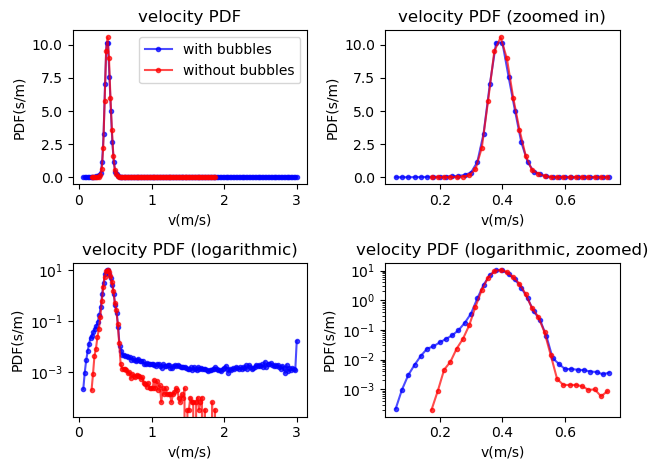

In [48]:
# We wish to make PDFs with equal binsizes
binwidth = 0.02
bins = np.arange(min(v), max(v) + binwidth, binwidth)

a = np.histogram(v, bins=bins, density=True)
dv = abs((a[1][1]-a[1][2]))*0.5
binmids = dv + a[1][:-1]

bins = np.arange(min(vmask), max(vmask) + binwidth, binwidth)
a1 = np.histogram(vmask, bins=bins, density=True)
dv = abs((a1[1][1]-a1[1][2]))*0.5
binmids1 = dv + a1[1][:-1]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(binmids, a[0], color='b',
               label='with bubbles', alpha=0.7, marker='.')
axs[0, 0].plot(binmids1, a1[0], color='r',
               label='without bubbles', alpha=0.7, marker='.')
axs[0, 0].set_title('velocity PDF')
axs[0, 0].legend()

axs[0, 1].plot(binmids[binmids < 0.75], a[0][binmids < 0.75],
               color='b', label='with bubbles', alpha=0.7, marker='.')
axs[0, 1].plot(binmids1[binmids1 < 0.75], a1[0][binmids1 < 0.75],
               color='r', label='without bubbles', alpha=0.7, marker='.')
axs[0, 1].set_title('velocity PDF (zoomed in)')

axs[1, 0].plot(binmids, a[0], color='b',
               label='with bubbles', alpha=0.7, marker='.')
axs[1, 0].plot(binmids1, a1[0], color='r',
               label='without bubbles', alpha=0.7, marker='.')
axs[1, 0].set_title('velocity PDF (logarithmic)')
axs[1, 0].set_yscale('log')

axs[1, 1].plot(binmids[binmids < 0.75], a[0][binmids < 0.75],
               color='b', label='with bubbles', alpha=0.7, marker='.')
axs[1, 1].plot(binmids1[binmids1 < 0.75], a1[0][binmids1 < 0.75],
               color='r', label='without bubbles', alpha=0.7, marker='.')
axs[1, 1].set_title('velocity PDF (logarithmic, zoomed)')
axs[1, 1].set_yscale('log')

for ax in axs.flat:
    ax.set(xlabel='v (m/s)', ylabel='PDF (s/m)')

fig.tight_layout()

Below, we illustrate the process of choosing the right bin size. From top to bottom, left to right, the number of bins (and therefore the resolution of the PDF) decreases. Above each subplot, the number of bins for the unmasked data (the entire dataset, in this case) is annotated. Obviously, the masked data has fewer data points, and therefore a smaller number of bins.

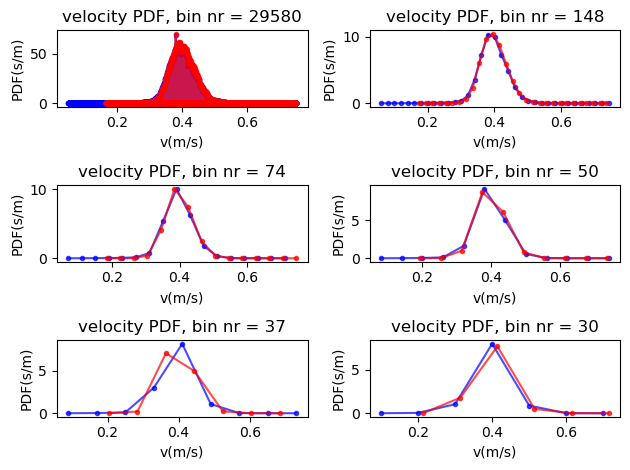

In [51]:
fig, axs = plt.subplots(3, 2)
binwidth = 0.0001  # could be turned into a list of values to try
for i in range(3):
    for j in range(2):
        # We wish to make PDFs with equal binsizes
        bins = np.arange(min(v), max(v) + binwidth, binwidth)

        a = np.histogram(v, bins=bins, density=True)
        dv = abs((a[1][1]-a[1][2]))*0.5
        binmids = dv + a[1][:-1]

        bins = np.arange(min(vmask), max(vmask) + binwidth, binwidth)
        a1 = np.histogram(vmask, bins=bins, density=True)
        dv = abs((a1[1][1]-a1[1][2]))*0.5
        binmids1 = dv + a1[1][:-1]

        axs[i, j].plot(binmids[binmids < 0.75], a[0][binmids < 0.75],
                       color='b', label='with bubbles', alpha=0.7, marker='.')
        axs[i, j].plot(binmids1[binmids1 < 0.75], a1[0][binmids1 < 0.75],
                       color='r', label='without bubbles', alpha=0.7, marker='.')
        axs[i, j].set_title(f'velocity PDF, bin nr = {len(binmids)}')
        binwidth += 0.02
for ax in axs.flat:
    ax.set(xlabel='v (m/s)', ylabel='PDF (s/m)')

fig.tight_layout()

## Part b: Thermistor principles and calibration (9 points)
### 1b1) **Fitting the Steinhart-Hart equation**

By fitting the Steinhart-Hart equation (inverse temperature $T^{-1}$ as a function of resistance $R$) to some known thermistor resistance values, we can obtain the parameters $A$, $B$, and $C$.

In [85]:
from scipy.optimize import curve_fit


def steinhart_hart(R, A, B, C):
    T_inv = A + B * np.log(R) + C * (np.log(R)**3)
    return T_inv


# using loadtxt()
arr = np.loadtxt("Data/thermistor.csv", skiprows=1, delimiter=',')
R = arr[:, 0]
T = arr[:, 1] + 273.15  # convert to kelvin

# fit to function and plot
popt, pcov = curve_fit(steinhart_hart, R, 1/T)

A = popt[0]
B = popt[1]
C = popt[2]

errors = np.sqrt(np.diag(pcov))

print(f'A = {A:.6g}    +- {errors[0]:.2g}')
print(f'B = {B:.7g}   +- {errors[1]:.2g}')
print(f'C = {C:.9g} +- {errors[2]:.2g}')

A = 0.000999597    +- 2.5e-05
B = 0.0002427721   +- 4.3e-06
C = 1.46812769e-07 +- 1.8e-08


### 1b2) **Data points & fit**

The inverse of the fit we obtained is plotted below.

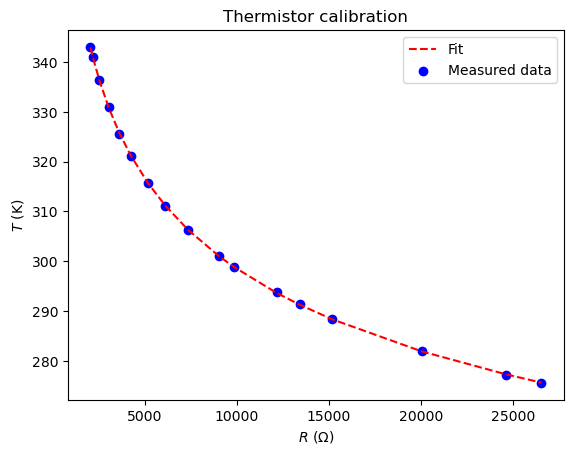

In [80]:
def calc_temp(R, A, B, C):
    T = 1/steinhart_hart(R, A, B, C)
    return T


Tcalc = calc_temp(R, *popt)

plt.plot(R, Tcalc, 'r--', label='Fit')
plt.scatter(R, T, c='b', label='Measured data')
plt.xlabel(r'$R$ $(\Omega)$')
plt.ylabel(r'$T$ (K)')
plt.title('Thermistor calibration')
plt.legend()
plt.show()

### 1b3) **Residuals**

The difference between the measured data and our fit is shown in the residual plot below.

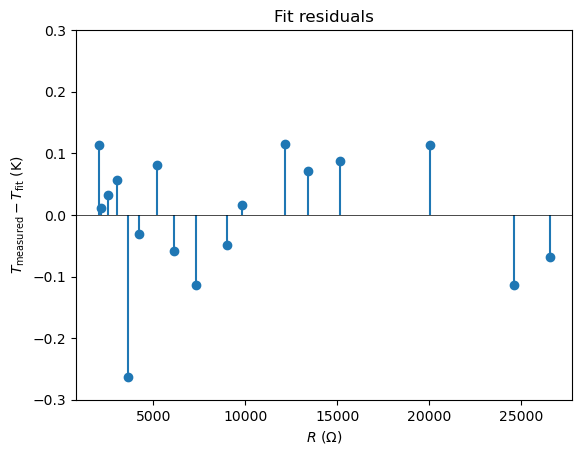

In [98]:
residual = T - (calc_temp(R, *popt))

plt.vlines(R, residual, 0)
plt.scatter(R, residual)
plt.axhline(0, color='black', lw=0.5)
plt.ylim([-0.3, 0.3])
plt.xlabel(r'$R$ $(\Omega)$')
plt.ylabel(r'$T_{\text{measured}}-T_{\text{fit}}$ (K)')
plt.title('Fit residuals')
plt.show()

### 1b4) **Thermistor accuracy**
The biggest error is seen around $R=3600$ $\Omega$, where it deviates $-0.25 \text{K}$ from the expected value according to the steinhart equation. The average deviation is $0.08$ $\text{K}$.

In [100]:
err = np.average(abs(residual))
print(f'Average residual: {round(err, 2)}')

Average residual: 0.08


### 1b5) **Passive resistance**
From the electrical circuit: the voltage over the resistor is given by $V_{\text{th}}=R_{\text{th}}I_{\text{tot}}$ and the total voltage $V_{\text{tot}}=(R_{\text{th}}+R_{\text{passive}})I_{\text{tot}}$.

Combining the two equations we get
$$V_{\text{th}}=\frac{R_{\text{th}}V{\text{tot}}}{R_{\text{th}}+R_{\text{passive}}}.$$
Now we consider the change in $V_{\text{th}}$ with respect to $R_{\text{th}}$:
$$\frac{d V_{\text{th}}}{d R_{\text{th}}} = \dfrac{R_{\text{passive}}V_{\text{tot}}}{\left(R_{\text{th}}+R_{\text{passive}}\right)^2}.$$

From this equation, we can see that if we make $R_{\text{passive}}$ too big, then $R_{\text{th}}$ will not matter in the denominator, and we will not have a big change in the measured voltage $V_{\text{th}}$ with temperature. On the other hand, if we make $R_{\text{passive}}$ too small, then the change in $V_{\text{th}}$ will also be very small with a change in $R_{\text{th}}$.

So we want to choose our $R_{\text{passive}}$ to be of the same order of magnitude as $R_{\text{th}}$, so ~$3\cdot10^{3}$ $\Omega$. This way, we can measure small changes in temperature in the range we are currently working in. To illustrate this, we have plotted the measured $V_{\text{th}}$ for a voltage source of $10$ $V$ for different values of $R_{\text{passive}}$ in the temperature range we are measuring in.

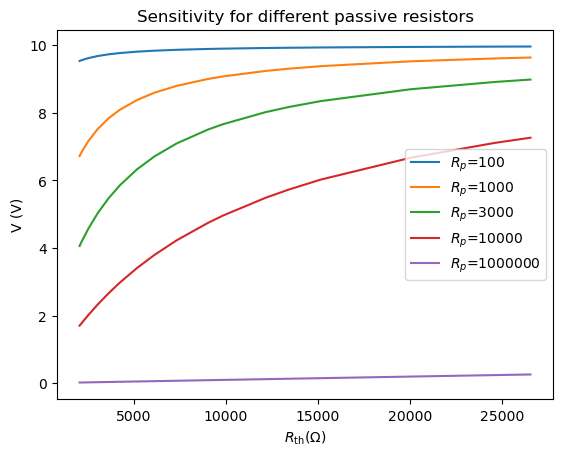

In [114]:
Rp_list = [100, 1000, 3000, 10000, 1000000]
Vtot = 10
for i in range(len(Rp_list)):
    Rp = Rp_list[i]
    Vth = R*Vtot/(R+Rp)
    plt.plot(R, Vth, label=f'$R_p$={Rp}')
plt.xlabel(r'$R_{\text{th}}(\Omega)$')
plt.ylabel('V (V)')
plt.title('Sensitivity for different passive resistors')
plt.legend()
plt.show()

### b6) **Voltage vs. temperature**

For a power supply of $10$ $V$, and $R_{\text{passive}}=3000$ $\Omega$, the measured voltage is plotted as a function of the temperature. TODO: IETS OVER DAT DEZE NIET LINEAIR IS? EN WAAROM HIER OOK V_TH PLOTTEN?

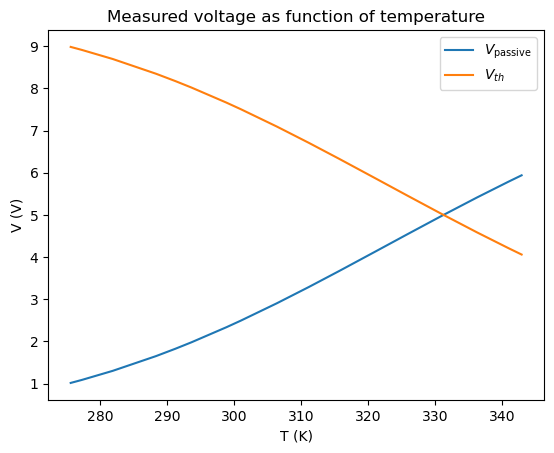

In [115]:
Rp = 3e3
Vtot = 10
Vth = R*Vtot/(R+Rp)
Vpas = Vtot - Vth

plt.figure()
plt.plot(Tcalc, Vpas, label=r'$V_{\text{passive}}$')
plt.plot(Tcalc, Vth, label=r'$V_{th}$')
plt.xlabel('T (K)')
plt.ylabel('V (V)')
plt.title('Measured voltage as function of temperature')
plt.legend()
plt.show()

## Part c: Data analysis on TMHT thermistor data (11 points)

### 1c1) **Bubble wake & shape**
We start by calculating three relevant dimensionless groups. The Reynolds number of a bubble in the TMHT channel is given by $$\mathrm{Re} = \frac{\rho_c U d}{\mu},$$ where:
- The density of water is $\rho_c=998.207$ $\text{kg/m}^3$ (at $20$ $\text{°C}$);
- The viscosity is $\mu=1.0016$ $\text{mPa s}$ (also at $20$ $\text{°C}$);
- The characteristic length scale is equal to the droplet diameter: $d=2.5*10^{-3}$ $\text{m}$ (like for a sphere in a fluid, see https://en.wikipedia.org/wiki/Reynolds_number#Sphere_in_a_fluid);
- The velocity is taken relative to liquid, i.e. $20 \%$ of the liquid velocity: $U=0.5$ $\text{m/s}$.

*Note that, if the bubbles were to be rising with exactly the same velocity as the liquid, any turbulent effects in the liquid flow itself would not show up in this Reynolds number, as $U=0$ in that case. Therefore, in a more thorough analysis, this flow would also have to be taken into account.*

In [3]:
rho_c = 998.207     # kg/m^3
mu_c = 1.0016e-3    # Pa s
d = 2.5*1e-3        # m
U = 0.2*0.5         # m/s

Re = (rho_c * U * d) / mu_c
print(f'Re ≈ {Re:.0f}')

Re ≈ 249


Next, the Bond (or Eötvös) number is $$\mathrm{Bo} = \frac{\Delta\rho g (\frac{1}{2}d)^2}{\sigma},$$ where:
- The difference in density between the bubble and its surroundings $\Delta \rho = \rho_c - \rho_a$;
- The density of the air inside the bubble is $\rho_a=1.293$ $\text{kg/m}^3$ (at $20$ $\text{°C}$);
- Acceleration due to gravity $g=9.81$ $\text{m/s}^2$;
- The characteristic length scale is now the bubble radius, which is $\frac{1}{2}d$ (note: different sources use different length scales here);
- The surface tension of water in air is $\sigma=72.8*10^{-3}$ $\text{N/m}$ (https://www.nanoscience.com/techniques/tensiometry/surface-and-interfacial-tension/).

In [4]:
rho_a = 1.293       # kg/m^3
g = 9.81            # m/s^2
sigma = 72.8e-3     # N/m

Bo = (rho_c - rho_a) * g * (0.5*d)**2 / sigma
print(f'Bo ≈ {Bo:.2f}')

Bo ≈ 0.21


Finally, the Morton number is given by $$\mathrm{Mo}=\frac{g \mu_c^4 \Delta\rho}{\rho_c^2 \sigma^3}.$$ We calculate the base 10 logarithm to check against the chart [Clift, R., Grace, J. R. & Weber, M. E. *Bubbles, drops, and particles*. (Dover Publ, 1978)]
given below.

log10(Mo) ≈ -10.6


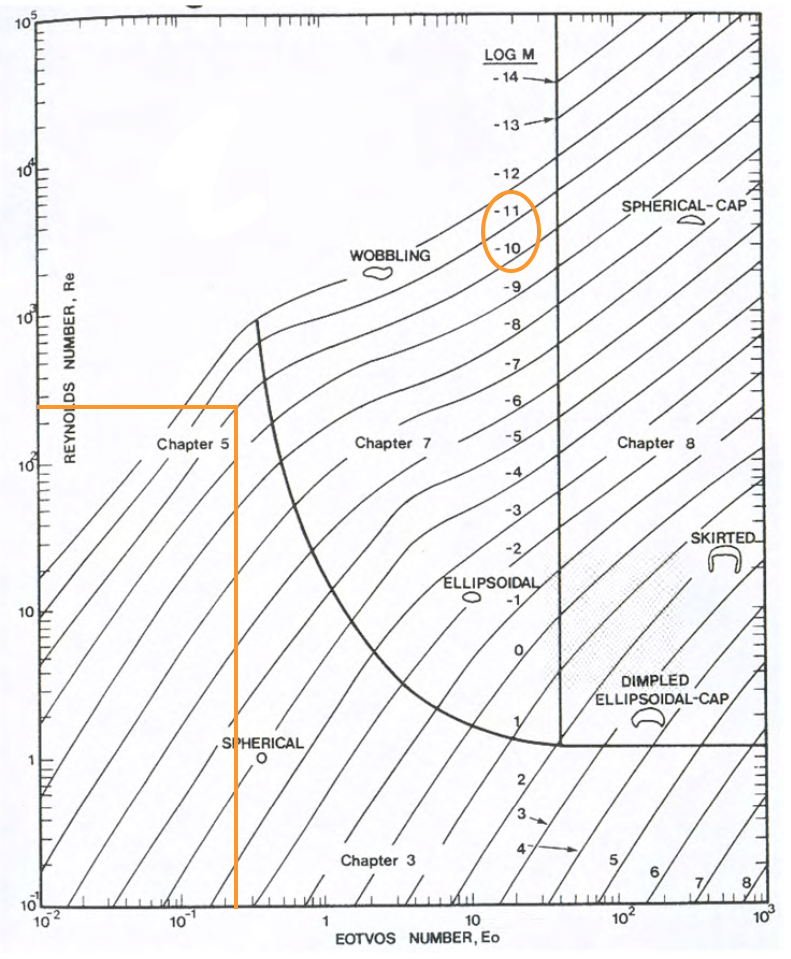

In [5]:
from IPython.display import Image
Mo = g * mu_c**4 * (rho_c - rho_a) / (rho_c**2 * sigma**3)
print(f'log10(Mo) ≈ {np.log10(Mo):.1f}')

Image(filename='Re-Bo graph.png', width=400)

Using the Reynolds number and Bond (Eötvös) number, we can conclude from the chart that the bubbles will be slightly wobbly, and closer to ellipsoidal than to spherical, but definitely not cap-shaped. This point corresponds to a slightly lower value of $\text{log}_{10}(\text{Mo})$ than calculated, however. This might be due to underlying assumptions in the chart, but we have not looked further into this.

Regarding the wake, consider the sketch given below [Kong, G. et al. *Hydrodynamic interaction of bubbles rising side-by-side in viscous liquids*. Experiments in Fluids 60, (2019).]. These are bubbles with a slightly higher Bond number (between $1.50$ and $1.81$), but a Reynolds number of **(a)** $7.5$, **(b)** $84.9$, **(c)** $286.3$, and **(d)** $574.6$, respectively. Our bubbles will therefore most closely resemble case **(c)**, which is at the transition from a laminar to a turbulent wake, with vortices forming behind the bubbles, causing them to deform.

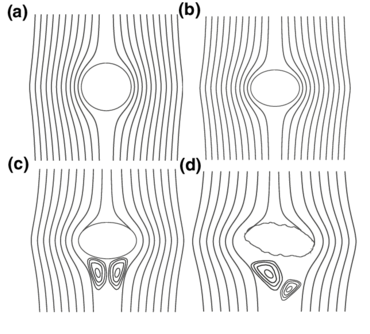

In [6]:
Image(filename='Wake structure.png', width=400)

### 1c2) **Mean, standard error and PDF**
Start by calibrating the resistance measurements by fitting the Steinhart-Hart equation again, using the definitions defined in part 1b1.

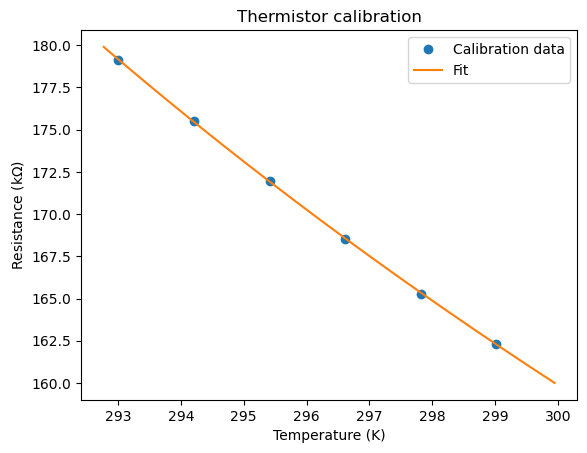

In [56]:
# Import data
[T_cal, R_cal] = np.squeeze(
    np.split(np.loadtxt('Data/ThermExperCalib.csv', delimiter=','), 2, axis=1))

# Fit the data
[A, B, C] = curve_fit(steinhart_hart, R_cal, 1/T_cal)[0]

# Plot
plt.plot(T_cal, R_cal/1000, 'o', label='Calibration data')

R_test = np.arange(160000, 180000, 100)
plt.plot(calc_temp(R_test, A, B, C), R_test/1000, label='Fit')
plt.legend()
plt.title('Thermistor calibration')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (k$\Omega$)')
plt.show()

Next, we import the data, and calculate the temperature using the function defined above. We can directly obtain the mean and standard deviation of the signals.

In [ ]:
# Import data
R_bub = np.loadtxt('Data/ThermBubData.csv', delimiter=',')
R_nobub = np.loadtxt('Data/ThermNoBubData.csv', delimiter=',')

# Calculate temperature
T_bub = calc_temp(R_bub, A, B, C)
T_nobub = calc_temp(R_nobub, A, B, C)

# Calculate and print statistics
T_mean_bub, T_std_bub = [np.mean(T_bub), np.std(T_bub)]
T_mean_nobub, T_std_nobub = [np.mean(T_nobub), np.std(T_nobub)]

print(f'Mean temperature (+- std) with bubbles: {T_mean_bub:.3f} +- {T_std_bub:.3f}'
      + f'\n                       without bubbles: {T_mean_nobub:.3f} +- {T_std_nobub:.3f}')

Mean temperature (+- std) with bubbles: 295.796 +- 0.032
                       without bubbles: 295.810 +- 0.035


Next, we calculate the PDFs, centre the bins that were output by the `np.histogram` function, and plot the results.

The number of bins in the histogram is chosen such that the graphs are smooth, without losing too much detail.

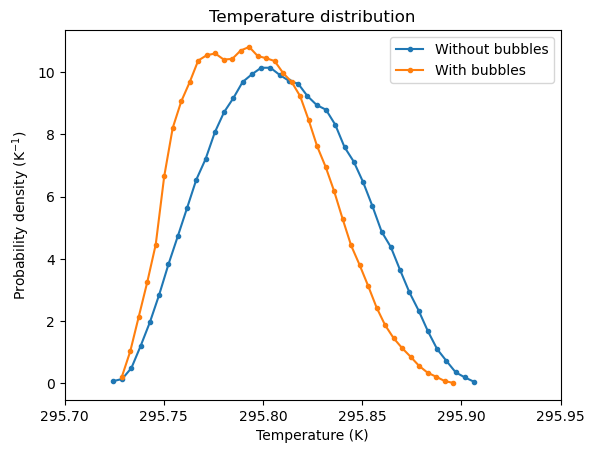

In [ ]:
# Calculate the probabiliy density function of the data
n_bins = 40

pdf_bub, bins_bub = np.histogram(T_bub, bins=n_bins, density=True)
bin_centers_bub = 0.5*(bins_bub[1:] + bins_bub[:-1])

pdf_nobub, bins_nobub = np.histogram(T_nobub, bins=n_bins, density=True)
bin_centers_nobub = 0.5*(bins_nobub[1:] + bins_nobub[:-1])

plt.plot(bin_centers_nobub, pdf_nobub, '.-', label='Without bubbles')
plt.plot(bin_centers_bub, pdf_bub, '.-', label='With bubbles')

plt.xlim([295.7, 295.95])
plt.legend()
plt.title('Temperature distribution')
plt.xlabel('Temperature (K)')
plt.ylabel('Probability density (K$^{-1}$)')
plt.show()

It is clear that, even though the distribution itself is fairly similar (considering the mean and standard deviation), the temperature distribution is skewed slightly towards the colder side when bubbles are present in the channel.

We can check whether these PDFs are properly normalised: the probability of having *any* temperature should be equal to $100\%$, so $\int^{\infty}_{-\infty} PDF(x) \mathrm{d}x=1$.

In [ ]:
print('The total probabilities of the above pdfs are '
      + str(np.sum(pdf_bub * (bins_bub[1] - bins_bub[0]))) + ' and '
      + str(np.sum(pdf_nobub * (bins_nobub[1] - bins_nobub[0]))) + ', respectively.')

The total probabilities of the above pdfs are 0.9999999999980371 and 0.9999999999975694, respectively.


### 1c3) **Power spectra**

Below, we calculate the (averaged) power spectra of the two temperature signals. The number of pieces in which we have split the signal when applying the Bartlett method is such that as much noise as possible is averaged out, while still having sufficiently many data points to see the start of the inertial range (which is coloured grey) at around $1 \rm{Hz}$. 

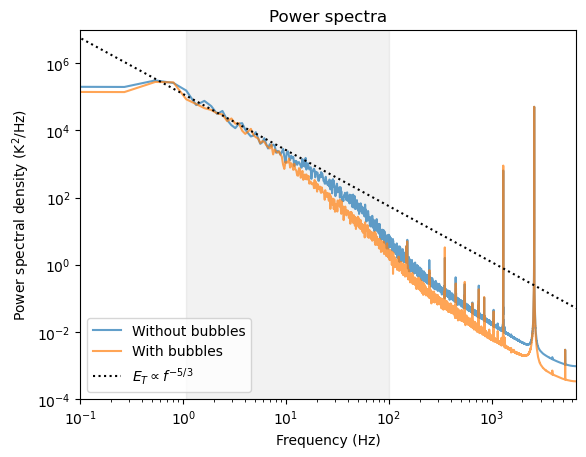

In [ ]:
def bartlett_fft(signal, fs, n_pieces):
    # Cut the signal into n equally-sized pieces
    signal_list = np.split(signal, n_pieces)
    P_list = []

    # Calculate power spectrum of each piece
    for piece in signal_list:
        P_list.append(np.abs(np.fft.fft(piece))**2)

    # Calculate the average power spectrum
    P_av = np.mean(P_list, axis=0)

    # Calculate the frequency array
    f = np.fft.fftfreq(piece.size, 1/fs)
    idx = np.argsort(f)

    # Get only positive frequencies
    f, P_av = f[idx], P_av[idx]

    return f, P_av


fs = 13.39*1e3     # Hz
n_pieces = 20

f, PS_nobub = bartlett_fft(T_nobub, fs, n_pieces)
f, PS_bub = bartlett_fft(T_bub, fs, n_pieces)

f_slope = np.logspace(-2, 4, 100)
PS_slope = 12e4*f_slope**(-5/3)

fig, ax = plt.subplots()
plt.loglog(f, PS_nobub, '-', alpha=0.7, label='Without bubbles')
plt.loglog(f, PS_bub, '-', alpha=0.7, label='With bubbles')
plt.loglog(f_slope, PS_slope, ':', color='k',
           label='$E_T \propto f^{-5/3}$')
ax.fill_between(f, 1e-4, 1e7, where=(f > 1) &
                (f < 100), color='gray', alpha=0.1)

plt.xlim([0.1, fs/2])
plt.ylim([1e-4, 1e7])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (K$^2$/Hz)')
plt.title('Power spectra')
plt.show()

From the above plot, we can see that, in both cases, the power spectrum starts to decay faster than $E_T\propto f^{-5/3}$ at some point. This signifies the end of the inertial range. This onset occurs at lower frequencies when bubbles are present in the flow (around $5$ $\text{Hz}$ instead of $20$ $\text{Hz}$). In other words, the bubbles seem to dampen fast temperature oscillations.

Furthermore, multiple peaks are present at the upper end of the spectrum (the largest of these, at around $1200$ and $2400$ $\text{Hz}$, seem to be harmonics). The magnitudes of these peaks are about equal - no matter whether bubbles are present in the system or not. In the schematic of the TMHT system given below, we have marked three potential sources of mechanical oscillations that might influence the temperature measurements. Of these, the bubble injector is turned off in the no-bubble case, and we are unsure how the turbulent grid works. The motor of a pump, however, could be at the root of these large peaks, depending on e.g., how fast it is spinning.

In conclusion, we suspect these peaks are indeed physical, but they are irrelevant when considering the heat transfer in the TMHT setup.

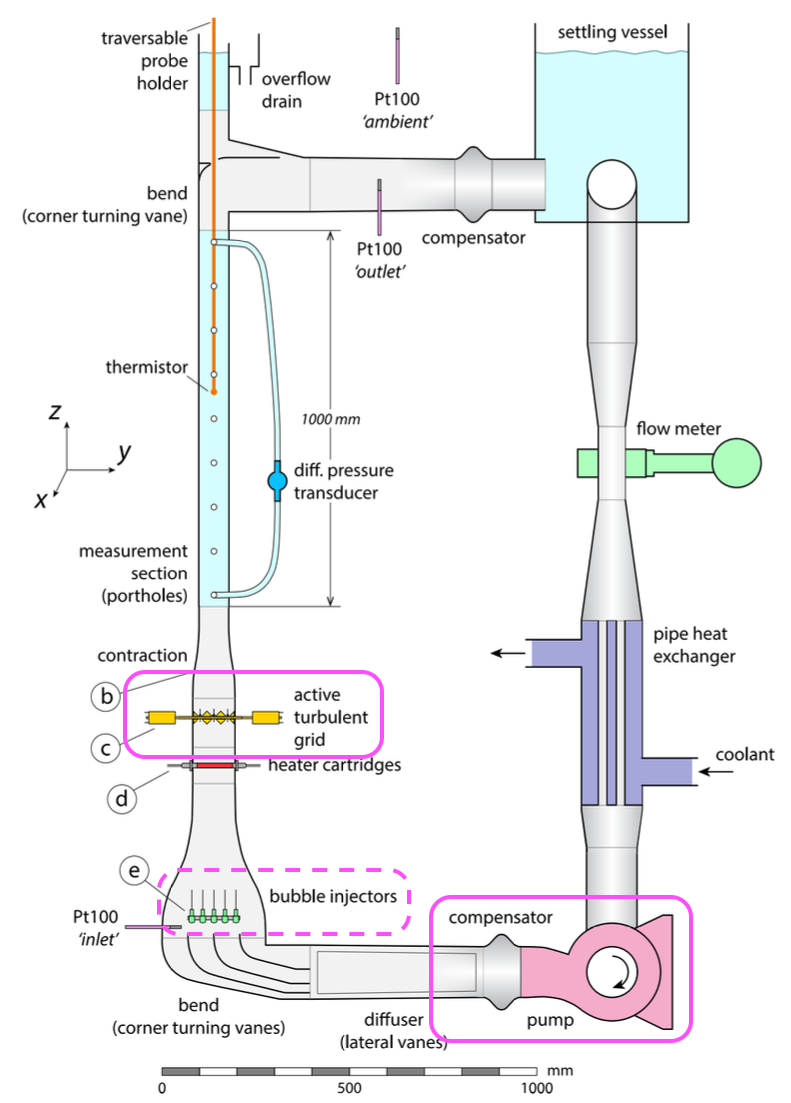

In [8]:
Image(filename='TMHT schematic.png', width=500)

### 1c4) **Scalar quantities**

To distinguish other relevant scalar quantities, we consider again the dimensionless numbers that can be used to describe this system. The scalar quantities making up these numbers include density, viscosity and surface tension. We highlight two important examples, which are not limited to the TMHT system, and relevant in many other systems:
1. The *viscosity* of the liquid in the channel. This has a large influence on wake behaviour, and therefore on the heat transfer through the channel. For a more viscous liquid, the Reynolds number would increase, leading to a more wobbly bubble (see the $\text{Re}(\text{Bo})$ chart above) with a more turbulent wake. A viscometer or rheometer can be used to determine the viscosity, by measuring the torque needed to rotate a cylinder or plate geometry, respectively.
2. The *surface tension* of the gas-liquid interface. This scalar shows up in the Bond number, where it influences the shape of the bubble: the larger the surface tension, the more spherical the bubble will be. For very low surface tension values, the bubble will become hollow. This, in turn, will play a role in the heat transfer too (TODO: HOW?). By fitting the shape of a pendant droplet, one can calculate the surface tension.